**Write TensorFlow program  to  create a Binary image classifier for the given data to classify images to  indoor and outdoor images. Use Keras API to create the multilayer neural network model.**  



**Try out various configurations for the model and number of epochs for training and submit the code with the best possible accuracy.**  



**Submit only the jupyter notebook.**  

 

**Data set :**

- Downloaded images from google
- Indoor photos – 250 , outdoor photos- 300

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
tf.__version__

'2.6.0'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rotation_range=30, shear_range=0.2, width_shift_range=2, zoom_range=0.3, 
                            vertical_flip=True, rescale=1./255)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
!ls Photographs

test       train      validation


In [8]:
train_generator = train_datagen.flow_from_directory(
        'Photographs/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'Photographs/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Show the first nine images and labels from the training set:

In [9]:
train_generator.class_indices

{'indoor': 0, 'outdoor': 1}

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D

In [11]:
## Initialising the CNN
classifier = Sequential()

2022-01-26 20:26:10.765639: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling=None,
    classes=2,
    classifier_activation="relu",
)

In [13]:
base_model.trainable = False

In [14]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [15]:
classifier = Sequential(
    base_model
)

classifier.add(Flatten())
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [16]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 15,026,497
Trainable params: 311,809
Non-trainable params: 14,714,688
____________________________________

In [17]:
train_generator.class_indices

{'indoor': 0, 'outdoor': 1}

In [18]:
base_learning_rate = 0.0001

In [19]:
import math

In [20]:
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(), 
    metrics=['accuracy'])

In [21]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * math.exp(-0.1)

In [22]:
## fitting model to images
history = classifier.fit(train_generator,epochs=30,validation_data=validation_generator, 
               callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])

2022-01-26 20:26:12.903397: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
13/13 [==============================] - 16s 1s/step - loss: 0.6568 - accuracy: 0.6800 - val_loss: 0.5915 - val_accuracy: 0.9200
Epoch 2/30
13/13 [==============================] - 14s 1s/step - loss: 0.5314 - accuracy: 0.8825 - val_loss: 0.4544 - val_accuracy: 0.9600
Epoch 3/30
13/13 [==============================] - 13s 1s/step - loss: 0.4086 - accuracy: 0.9000 - val_loss: 0.3286 - val_accuracy: 0.9200
Epoch 4/30
13/13 [==============================] - 13s 954ms/step - loss: 0.3164 - accuracy: 0.9025 - val_loss: 0.2357 - val_accuracy: 0.9200
Epoch 5/30
13/13 [==============================] - 13s 990ms/step - loss: 0.2347 - accuracy: 0.9400 - val_loss: 0.1695 - val_accuracy: 0.9600
Epoch 6/30
13/13 [==============================] - 14s 1s/step - loss: 0.2145 - accuracy: 0.9275 - val_loss: 0.1389 - val_accuracy: 0.9400
Epoch 7/30
13/13 [==============================] - 15s 1s/step - loss: 0.1762 - accuracy: 0.9425 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 8/30
13/

In [23]:
from tensorflow.keras.preprocessing import image

In [24]:
image_name = 'outdoor/5ce408eb2218f357aefad979.w800.jpg'

In [25]:
## prediction of single new data

test_image = image.load_img('Photographs/test/'+image_name ,target_size =(64,64))

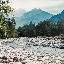

In [26]:
test_image

In [27]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [28]:
test_image

array([[[124., 123., 119.],
        [197., 199., 194.],
        [228., 224., 215.],
        ...,
        [229., 231., 228.],
        [229., 231., 228.],
        [228., 229., 224.]],

       [[ 89.,  88.,  68.],
        [230., 231., 213.],
        [ 15.,  17.,   3.],
        ...,
        [234., 233., 228.],
        [230., 231., 226.],
        [229., 229., 227.]],

       [[174., 178., 145.],
        [199., 200., 184.],
        [ 62.,  63.,  49.],
        ...,
        [232., 231., 227.],
        [229., 229., 227.],
        [228., 228., 228.]],

       ...,

       [[127., 121., 123.],
        [ 83.,  79.,  68.],
        [188., 170., 170.],
        ...,
        [157., 138., 132.],
        [126., 115., 109.],
        [163., 149., 149.]],

       [[136., 120., 107.],
        [131., 117., 117.],
        [ 90.,  71.,  54.],
        ...,
        [222., 208., 199.],
        [169., 159., 158.],
        [169., 164., 161.]],

       [[231., 220., 198.],
        [227., 214., 205.],
        [244., 2

In [29]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [30]:
result = classifier.predict(test_image)

In [31]:
result=np.around(result)

<IPython.core.display.Javascript object>

In [32]:
result

array([[1.]], dtype=float32)

In [33]:
## Class label of indoor and outdoor
if result == 1:
    prediction = 'This is an outdoor scene'
else:
    prediction = 'This is an indoor scene'

In [34]:
prediction

'This is an outdoor scene'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

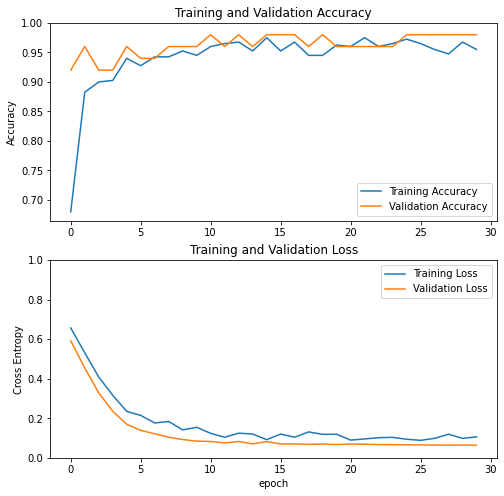

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()